In [18]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [10]:
# Put data in a pandas DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [11]:
# Add target and class to DataFrame
df_iris["target"] = iris.target

In [12]:
# Show 10 random samples
df_iris.sample(10)

,sepal length,sepal width,petal length,petal width,target
92,5.8,2.6,4.0,1.2,1
141,6.9,3.1,5.1,2.3,2
130,7.4,2.8,6.1,1.9,2
119,6.0,2.2,5.0,1.5,2
48,5.3,3.7,1.5,0.2,0
143,6.8,3.2,5.9,2.3,2
122,7.7,2.8,6.7,2.0,2
63,6.1,2.9,4.7,1.4,1
26,5.0,3.4,1.6,0.4,0
64,5.6,2.9,3.6,1.3,1


In [16]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [17]:
# same process as always, identify your X's and your y's
X = df_iris.drop(['target'],axis=1)
y= df_iris['target']

In [19]:
#train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# apply the lda transformation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis(n_components=2)


In [26]:
# select 2 principal components
X_train_scaled_lda= lda_model.fit_transform(X_scaled,Y_train)
X_test_scaled_lda= lda_model.transform(X_test_scaled)


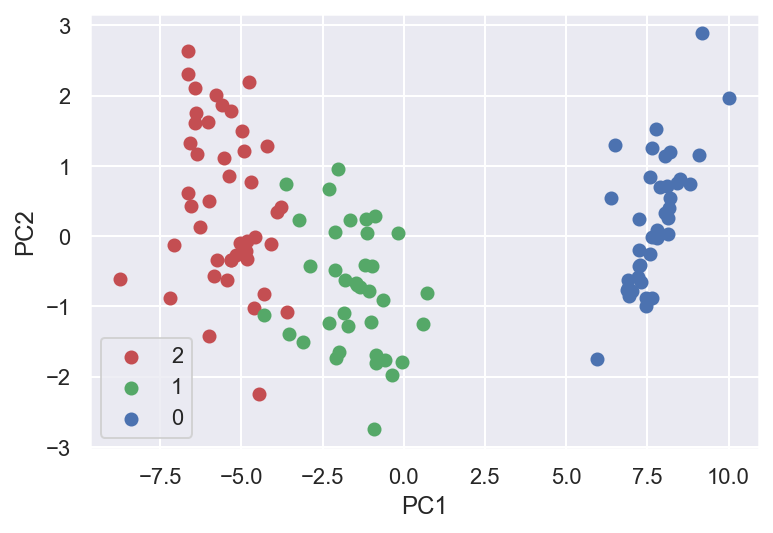

In [27]:
# take a look at the new axes for the data and plot them



colors = ["r", "g", "b"]

for label, color in zip(Y_train.unique(), colors):
    plt.scatter(X_train_scaled_lda[Y_train==label, 0], 
                X_train_scaled_lda[Y_train==label, 1], c=color, label=label)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# what about the variability?

In [1]:
# Run a Random Forest Classifier with the transformed data


In [2]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?